In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.model_selection import KFold,cross_val_score

# 1- Read the column description

In [177]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [179]:
# Identifying any null values in the columns
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#Checking all the rows have numeric values.
df[~df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


# 2- Study the data distribution in each attribute, share your findings.

# EDA with the Attributes and Observations

In [10]:
df.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
df.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [13]:
# Analyzing the Personal Loan Count

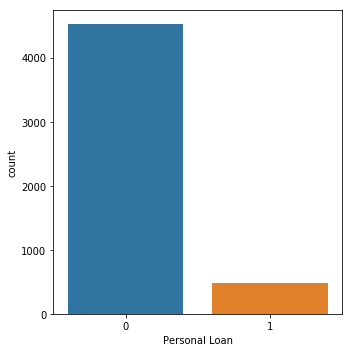

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(df['Personal Loan'])
plt.tight_layout()
plt.show()


# Only 480 Customers accepted the Loan while 4520 did not.

In [15]:
# Analysing Age.

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


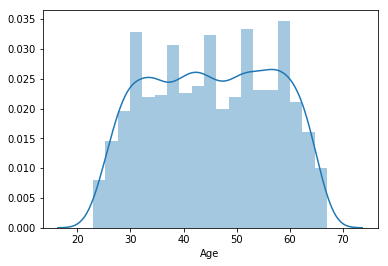

In [16]:
sns.distplot(df['Age'])

# Min Age is 23. There were no records from 1-22 taken in the sample.

In [180]:
# Analysing the Experience as from the describe method it had min value as -3 which means there are negative exps.
df[df['Experience'] < 0]['Experience'].count()

52

In [181]:
# Cleaning the Negative Value and getting the IDs of  negative exps 
pd.DataFrame(df[df['Experience'] < 0], columns=['Experience','Age']).sort_values('Age').head(10)

,Experience,Age
2717,-2,23
3130,-2,23
3425,-1,23
2962,-2,23
909,-1,23
3824,-1,23
4411,-2,23
4285,-3,23
3157,-1,23
2618,-3,23


In [182]:
df['Experience'] = df['Experience'].apply(abs)

In [183]:
df[df['Experience'] < 0]['Experience'].count()

0

# Hanlding negative value by taking its absolute value.

#  Distribution Analysis

1- Analysing the Income from Sample

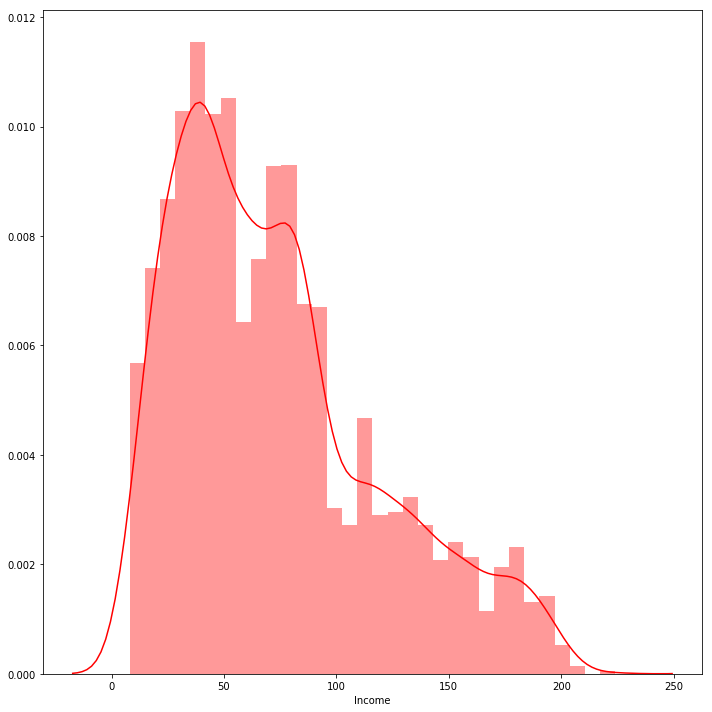

In [21]:
plt.figure(figsize=(10,10))
sns.distplot(df['Income'],color = 'red')
plt.tight_layout()
plt.show()


2- Analyzing the Mortgage from the sample

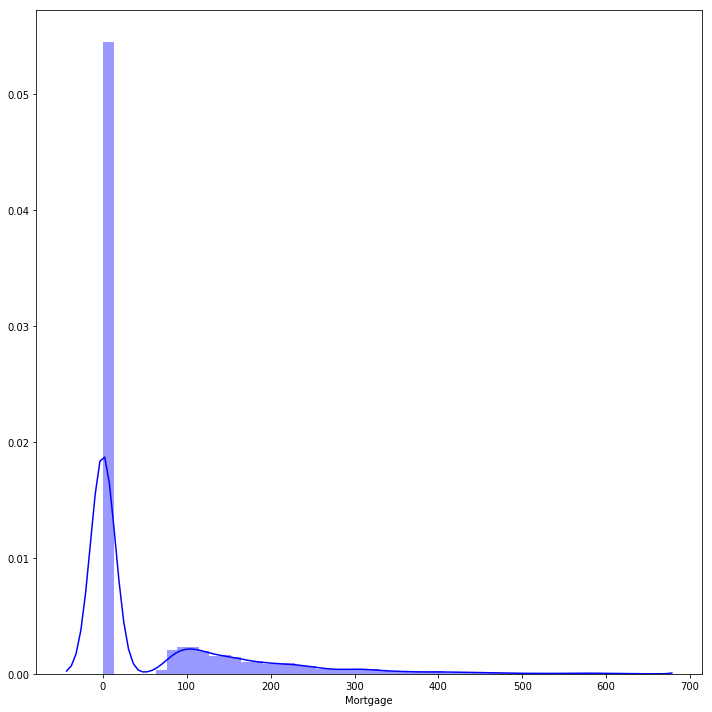

In [22]:

plt.figure(figsize=(10,10))
sns.distplot(df['Mortgage'],color = 'blue')
plt.tight_layout()
plt.show()


3- Analyzing the CCAvg from the sample

# right Sweked Income, Mortgage & CCAvg with Long Tails

# Visualizing the outliers through Box Plot

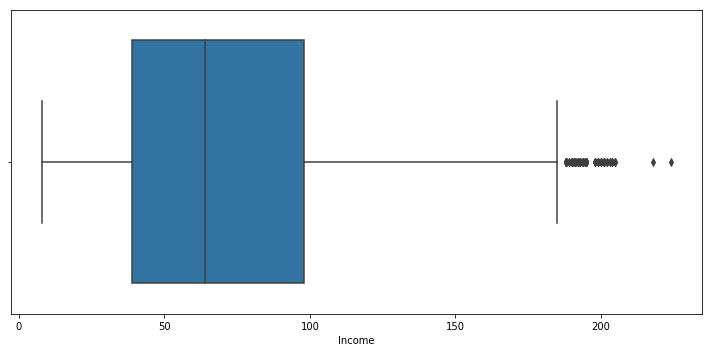

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Income'])
plt.tight_layout()
plt.show()

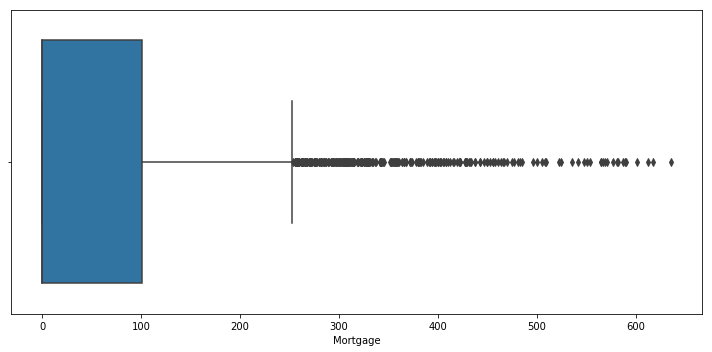

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Mortgage'])
plt.tight_layout()
plt.show()

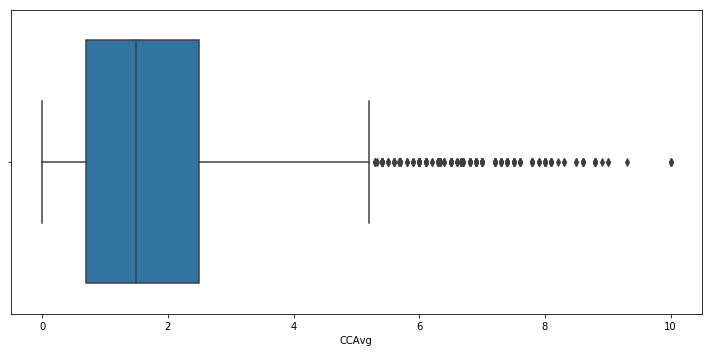

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(df['CCAvg'])
plt.tight_layout()
plt.show()


# Outliers existing for Income, Mortgage and CCAvg. Hence let us first analyse the outliers and take decision to drop or log transform the same.

In [184]:
# Outlier Detection

IQR = df.quantile(0.75) - df.quantile(0.25) 
print ('Lower outliers' '\n', df.quantile(0.25) - (1.5 * IQR ))
print ('\n')
print ('Higher outliers' '\n',df.quantile(0.75) + (1.5 * IQR ))  


Lower outliers
 ID                    -2498.5
Age                       5.0
Experience              -20.0
Income                  -49.5
ZIP Code              87865.5
Family                   -2.0
CCAvg                    -2.0
Education                -2.0
Mortgage               -151.5
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                   -1.5
CreditCard               -1.5
dtype: float64


Higher outliers
 ID                     7499.5
Age                      85.0
Experience               60.0
Income                  186.5
ZIP Code              98653.5
Family                    6.0
CCAvg                     5.2
Education                 6.0
Mortgage                252.5
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    2.5
CreditCard                2.5
dtype: float64


In [27]:
print  (df[df['Income'] > 186.5])

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
18      19   46          21     193     91604       2   8.10          3   
47      48   37          12     194     91380       4   0.20          3   
53      54   50          26     190     90245       3   2.10          3   
59      60   31           5     188     91320       2   4.50          1   
303    304   49          25     195     95605       4   3.00          1   
329    330   28           4     191     90064       1   6.33          1   
459    460   35          10     200     91107       2   3.00          1   
526    527   26           2     205     93106       1   6.33          1   
677    678   46          21     204     92780       2   2.80          1   
740    741   52          27     195     90266       1   8.10          1   
779    780   53          28     192     94304       2   6.40          3   
782    783   54          30     194     92056       3   6.00          3   
787    788   45          

We will Log Transform the Outliers and then view the data set again for Income and Mortgage


In [185]:
df['Income']= np.log(df['Income'])

In [186]:
from numpy import errstate,isneginf,array
df['Mortgage']= np.log(df['Mortgage'])

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [187]:
df['CCAvg']= np.log(df['CCAvg'])

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [188]:
df[isneginf(df)]=0
# replace -inf with 0

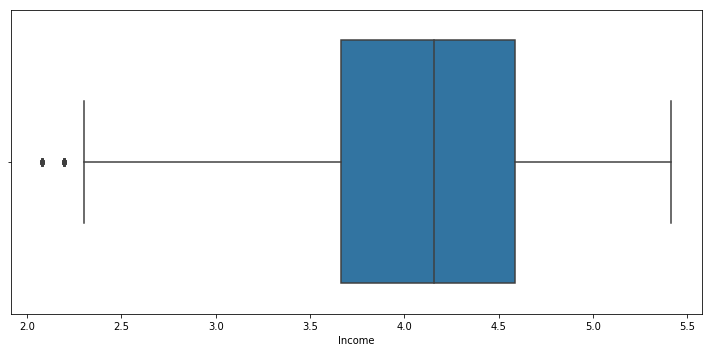

In [189]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Income'])
plt.tight_layout()
plt.show()

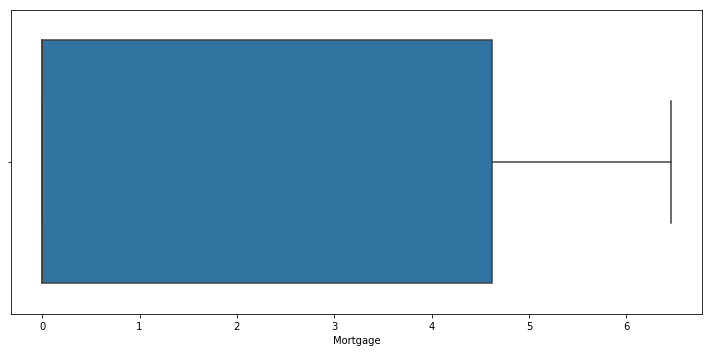

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Mortgage'])
plt.tight_layout()
plt.show()

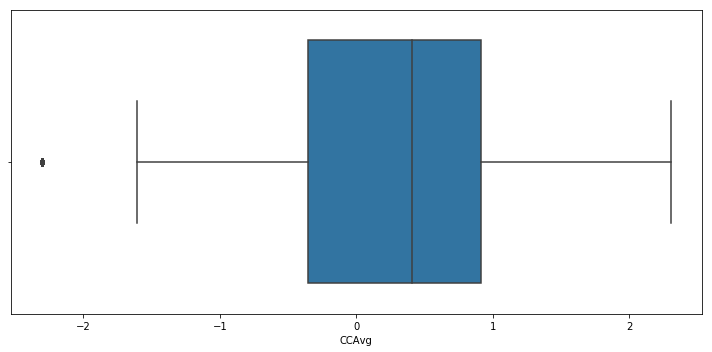

In [121]:
plt.figure(figsize=(10,5))
sns.boxplot(df['CCAvg'])
plt.tight_layout()
plt.show()

# Handled Outliers through Log Transformation

# 3- Get the target column distribution.

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


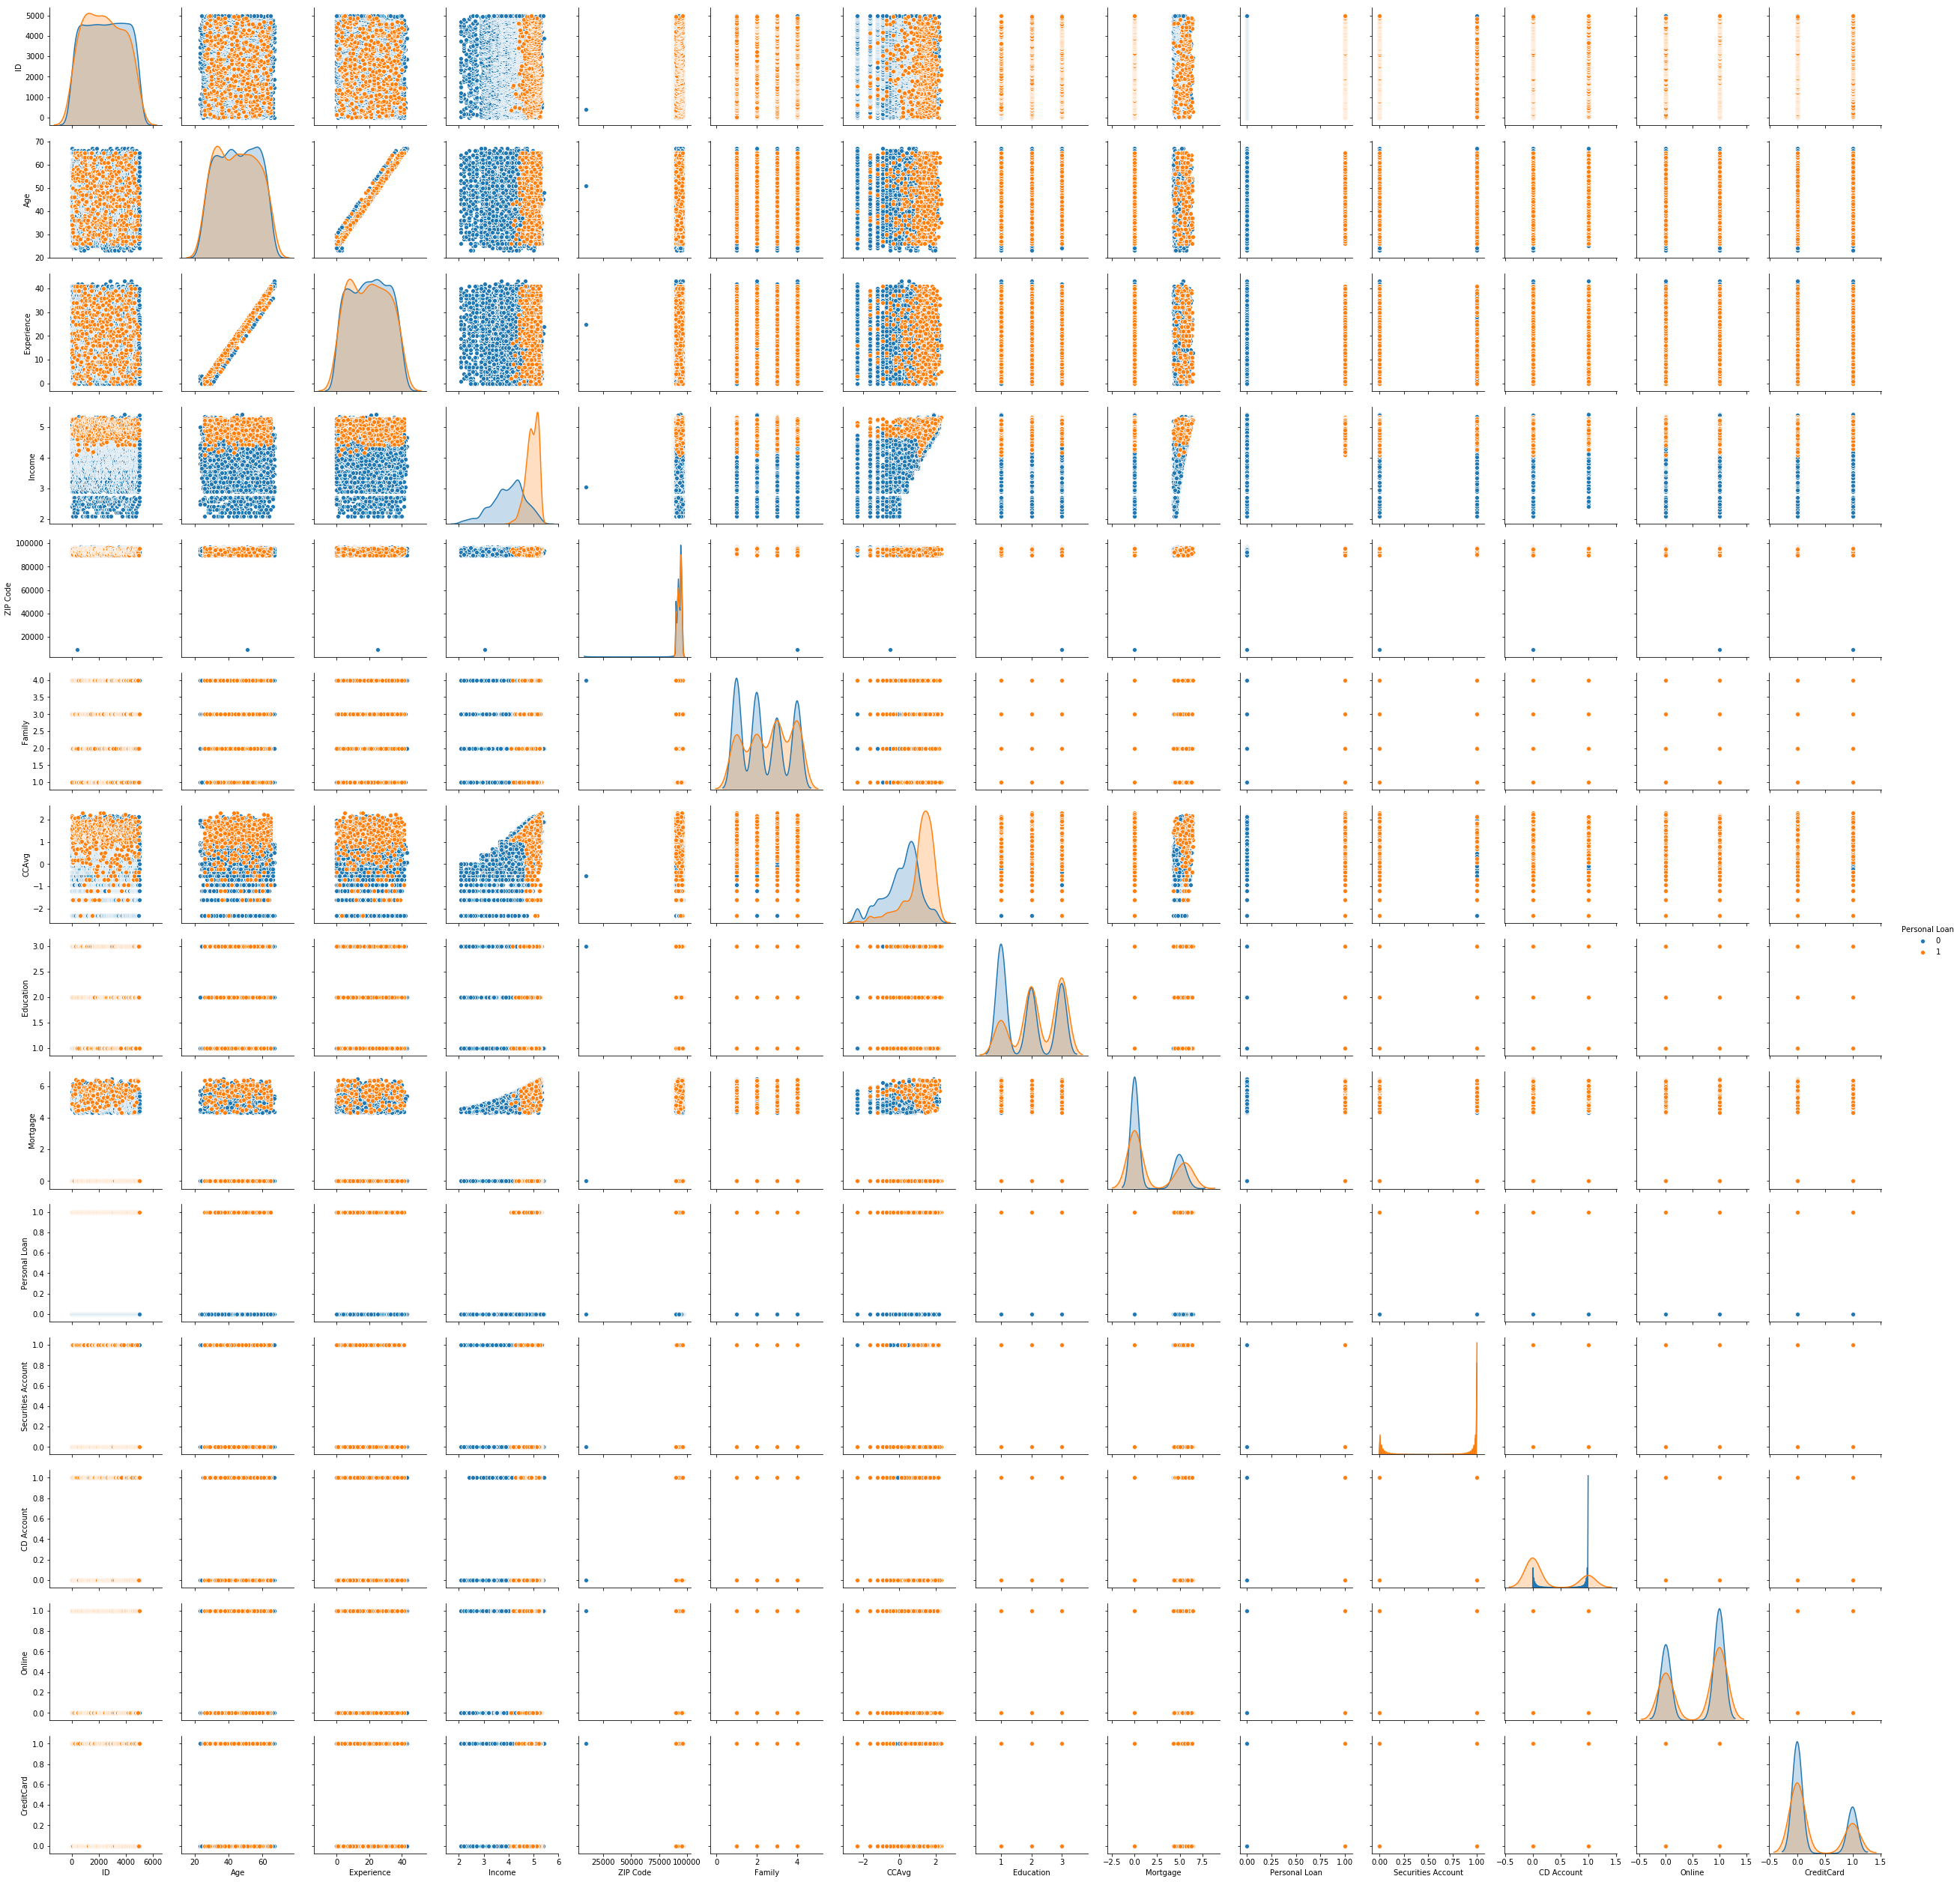

In [35]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Personal Loan')

Income and Education on Personal Loan Effect

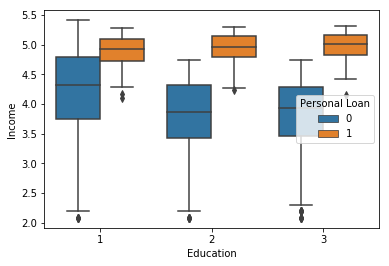

In [36]:
sns.boxplot(x = 'Education', y = 'Income', hue= 'Personal Loan', data = df)

Customer with Education level as 1 have higher income level

Impact of Loan on Family

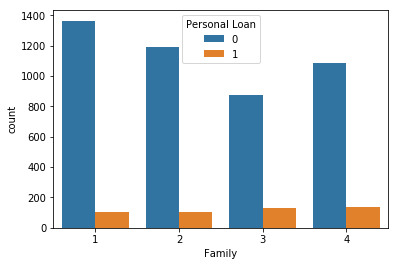

In [37]:
sns.countplot(x='Family',data = df, hue= 'Personal Loan')

Very less impact of Family on Loan. There is slight increase for familysize of 3 which can be targeted for future association.

Impact of Loan with Mortgage

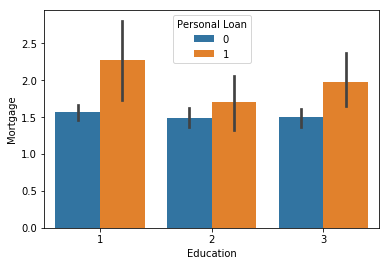

In [38]:
sns.barplot(x = 'Education', y = 'Mortgage',data = df, hue = 'Personal Loan')

House Mortgage for customers not accepting loan is lower then that of customers accepting the loan.

Impact of Security account on Loan

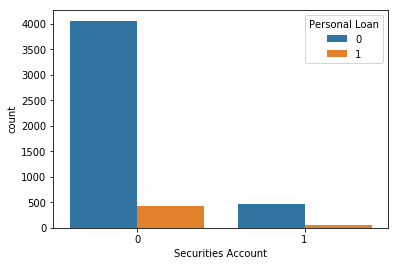

In [39]:
sns.countplot(x = 'Securities Account', data = df, hue = 'Personal Loan')

Majority of Customer with  Account does not have Loan

Impact of CDAccount on Loan

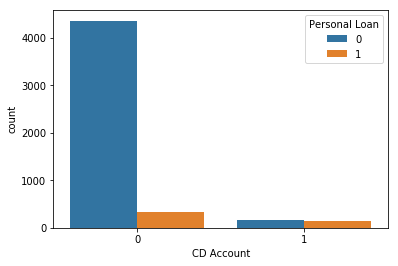

In [40]:
sns.countplot(x = 'CD Account', data = df, hue = 'Personal Loan')

In [41]:
# Customers with CD Account have also applied for Loan

#  OBSERVATIONS:
1- There are attributes which have perfectly symmetrical distributions. Their Central Values are overlapping hence the attributes are poor predictors. We will conduct ttest on few of them to analyze if the null hypothesis is accepted or rejected

2- For attributes like Family/Education there are multiple gausianns hence in producion there have to separate models for each of them. In this data set we will ignore this observation and create single model

3- Experience and Age seems to be good correlated among each other.

In [42]:
#test between Personal Loand and Online

In [43]:
import scipy.stats as stats

In [44]:
# 𝐻0 :  Personal Loan = Online
# 𝐻𝑎 :  Personal Loan ≠ Online

In [45]:
t_statistic, p_value  =  stats.ttest_rel(df['Personal Loan'],df['Online'])
print ('ttestsvalue is %1.3f, pvalue is %1.4f' %(t_statistic,p_value))

ttestsvalue is -62.053, pvalue is 0.0000


In [46]:
tcritic = stats.t.isf(0.025,4999)
print ('tcritical is %1.2f' % tcritic)

tcritical is 1.96


In [47]:
# testvalue > -tcritical  hence we can conclue that fail to reject H0 or accept the Null hypothesis. 
#  We can also conclude there is no difference between Online and Personal Loan attribute and Online is poor predictor of Personal Loan

#  Heatmap Correlation

In [190]:
X = df.drop(['ID','Personal Loan'],axis= 1)
y  = df['Personal Loan']

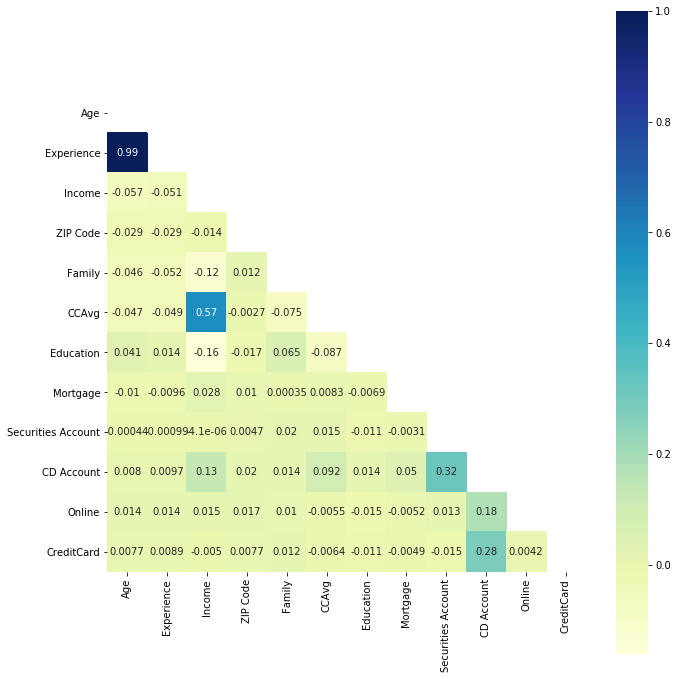

In [49]:
corr = X.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(corr)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap='YlGnBu', mask = mask, square= True)
plt.tight_layout()
plt.show()


In [50]:
corr_loan = X.join(y).corr()
corr_loan.transpose()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
Age,1.000000,0.993991,-0.057392,-0.029216,-0.046418,-0.047246,0.041334,-0.010223,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,0.993991,1.000000,-0.051231,-0.028936,-0.051851,-0.048562,0.013919,-0.009592,-0.000989,0.009735,0.014051,0.008851,-0.008304
Income,-0.057392,-0.051231,1.000000,-0.013666,-0.122900,0.569906,-0.161438,0.028107,-0.000004,0.132839,0.015186,-0.004971,0.404002
ZIP Code,-0.029216,-0.028936,-0.013666,1.000000,0.011778,-0.002696,-0.017377,0.010115,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.046418,-0.051851,-0.122900,0.011778,1.000000,-0.075438,0.064929,0.000346,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.047246,-0.048562,0.569906,-0.002696,-0.075438,1.000000,-0.086893,0.008333,0.014686,0.091687,-0.005525,-0.006373,0.282977
Education,0.041334,0.013919,-0.161438,-0.017377,0.064929,-0.086893,1.000000,-0.006893,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.010223,-0.009592,0.028107,0.010115,0.000346,0.008333,-0.006893,1.000000,-0.003114,0.050313,-0.005236,-0.004923,0.051095
Securities Account,-0.000436,-0.000989,-0.000004,0.004704,0.019994,0.014686,-0.010812,-0.003114,1.000000,0.317034,0.012627,-0.015028,0.021954
CD Account,0.008043,0.009735,0.132839,0.019972,0.014110,0.091687,0.013934,0.050313,0.317034,1.000000,0.175880,0.278644,0.316355


# Observations on Correlation:

1- Experience and Age are highly correlated among each other hence we will use one of them during model building.

2- Age, Zipcode, CreditCard, Online are all poor predictors with very poor correlation hence we will drop those.

In [191]:
X.drop(columns=['Age','ZIP Code','Online','CreditCard'],inplace= True)

# 4- Split the data into training and test set in the ratio of 70:30 respectively

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [193]:
lg = LogisticRegression()

In [194]:
lg.fit(X_train,y_train)

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [207]:
predictlog = lg.predict(X_test)

In [208]:
lg.score(X_test,y_test)

0.9293333333333333

In [209]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas_ml import ConfusionMatrix

In [212]:
print (confusion_matrix(y_test,predictlog))
print (classification_report(y_test,predictlog))

[[1335    8]
 [  98   59]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1343
           1       0.88      0.38      0.53       157

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.91      0.68      0.74      1500
weighted avg       0.93      0.93      0.92      1500



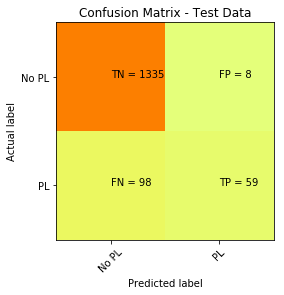

In [215]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, predictlog)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No PL','PL']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [216]:
TP = 59
FN = 98
TN = 1335
FP = 8

In [218]:
# Classification accuracy
print ((TP+TN)/float(TP+TN+FP+FN))
print (accuracy_score(y_test,predictlog))

0.9293333333333333
0.9293333333333333


In [220]:
# Misclassify error

print ((FP+FN)/float(TP+TN+FP+FN))
print (1 - accuracy_score(y_test,predictlog))

0.07066666666666667
0.07066666666666666


In [229]:
# Recall for class level 1 (interest of our class):
print (TP/ float(TP+FN))

0.37579617834394907


In [230]:
# Precision for Class Level 1(interest of our class):
print (TP/ float(TP+FP))

0.8805970149253731


In [231]:
# Adjusting the CLassification threshold to increase recall. We might take some hit on Precision 

In [233]:
# Print the first 10 predicted class with default threshold as 0.5
lg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [261]:
lg.predict_proba(X_test)[0:10,:]

array([[0.99818125, 0.00181875],
       [0.70239297, 0.29760703],
       [0.88527055, 0.11472945],
       [0.9952059 , 0.0047941 ],
       [0.99403922, 0.00596078],
       [0.94831216, 0.05168784],
       [0.86543924, 0.13456076],
       [0.84563128, 0.15436872],
       [0.98642472, 0.01357528],
       [0.84468026, 0.15531974]])

In [276]:
# Printing the first 10 records for class 1
lg.predict_proba(X_test)[0:10,1]

array([0.00181875, 0.29760703, 0.11472945, 0.0047941 , 0.00596078,
       0.05168784, 0.13456076, 0.15436872, 0.01357528, 0.15531974])

In [250]:
# Storing the predict probabilities in one array
y_pred_prob = lg.predict_proba(X_test)[:, 1]

In [251]:
# Importing binarize to define threshold.
from sklearn.preprocessing import binarize


In [285]:
y_pred_class = binarize([y_pred_prob],0.3)[0]

In [286]:
y_pred_prob[0:10] 

array([0.00181875, 0.29760703, 0.11472945, 0.0047941 , 0.00596078,
       0.05168784, 0.13456076, 0.15436872, 0.01357528, 0.15531974])

In [287]:
y_pred_class[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [292]:
# Look at Confusion Matrix now which shows after the threshold change we could see better recall rate.
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

[[1315   28]
 [  50  107]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.79      0.68      0.73       157

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.88      0.83      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [289]:
TP = 107
FN = 50
TN = 1315
FP = 28

In [290]:
# Recall increased
print (TP/ float(TP+FN))

0.6815286624203821


In [291]:
# precision level decreased 
print (TP/ float(TP+FP))

0.7925925925925926


In [60]:
#  Class level of Personal Loan (1) has precision of 79% and recall is 68%

# 2- Naive- Bayes Model    

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [62]:
X = np.array(X)
y = np.array(y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [132]:
gnb = GaussianNB()

In [133]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [134]:
predictgnb = GaussianNB(X_test)

In [135]:
predictgnb = np.array(predictgnb)

In [136]:
gnb.score(X_test,y_test)

0.9313333333333333

In [137]:
print (predictgnb)

GaussianNB(priors=      Age  Experience    Income  ZIP Code  Family     CCAvg  Education  \
1501   30           4  3.555348     92130       2 -1.203973          2
2586   47          23  5.003946     92675       4  1.808289          1
2653   30           5  4.795791     94555       2  1.131402          1 ...  0
1912  0.000000                   1           1       1           0

[1500 rows x 12 columns],
      var_smoothing=1e-09)


In [70]:
from sklearn.metrics import accuracy_score

In [71]:
# print (confusion_matrix(y_test,predictgnb))
# print (classification_report(y_test,predictgnb))


# 3- KNN Model

In [91]:
X = X.apply(zscore)  # convert all attributes to Z scale 

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [138]:
KNH = KNeighborsClassifier()

In [139]:
KNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [140]:
predictKnn = KNH.predict(X_test)

In [141]:
KNH.score(X_test,y_test)

0.894

In [142]:
print (confusion_matrix(y_test,predictKnn))
print (classification_report(y_test,predictKnn))

[[1338    5]
 [ 154    3]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1343
           1       0.38      0.02      0.04       157

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.64      0.51      0.49      1500
weighted avg       0.84      0.89      0.85      1500



In [143]:
cm.print_stats()

Confusion Matrix:

Predicted    0  1  __all__
Actual                    
0          426  0      426
1           45  0       45
__all__    471  0      471


Overall Statistics:

Accuracy: 0.9044585987261147
95% CI: (0.8742492253558974, 0.9294561871525667)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0          1
Population                                   471        471
P: Condition positive                        426         45
N: Condition negative                         45        426
Test outcome positive                        471          0
Test outcome negative                          0        471
TP: True Positive                            426          0
TN: True Negative                              0        426
FP: False Positive                            45          0
FN: False Negative                             0         45
TPR: (Sensitivity, hit rate, reca

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:259: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.NegativeTest)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:302: RuntimeWarning: invalid value encountered in true_divide
  * (self.TN + self.FP) * (self.TN + self.FN)))
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FNR)

In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,100))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 8


In [ ]:
# n_neighbours = 1 from above.

In [146]:
KNH = KNeighborsClassifier(n_neighbors= 8 )
KNH.fit(X_train,y_train)
predictKnn = KNH.predict(X_test)
KNH.score(X_test,y_test)


0.8953333333333333

In [101]:
print (confusion_matrix(y_test,predictKnn))
print (classification_report(y_test,predictKnn))

[[1331   12]
 [  70   87]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.88      0.55      0.68       157

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.91      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [293]:
# models = []
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('LG', LogisticRegression()))
# models.append(('NB', GaussianNB()))
# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
# 	kfold = KFold(n_splits=10, random_state=1)
# 	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
# 	results.append(cv_results)
# 	names.append(name)
# 	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# 	print(msg)
# # boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

In [ ]:
#  Analyzing through ROC and AUC Curve.

In [147]:
probas_1 = lg.predict_proba(X_test)
probas_2 = gnb.predict_proba(X_test)
probas_3 = KNH.predict_proba(X_test)

In [149]:
import pylab as pl
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

In [150]:
probas_1

array([[0.90561396, 0.09438604],
       [0.90675117, 0.09324883],
       [0.9105801 , 0.0894199 ],
       ...,
       [0.90124422, 0.09875578],
       [0.90660787, 0.09339213],
       [0.91007724, 0.08992276]])

In [153]:
fpr1,tpr1,threshold1 = roc_curve(y_test,probas_1[:,1])
roc_curve1 = auc(fpr1,tpr1)
print('Area under curver: %f' %roc_curve1)

Area under curver: 0.465452


In [156]:
fpr2,tpr2,threshold2 = roc_curve(y_test,probas_2[:,1])
roc_curve2 = auc(fpr2,tpr2)
print('Area under curver: %f' %roc_curve2)

Area under curver: 0.950482


In [158]:
fpr3,tpr3,threshold3 = roc_curve(y_test,probas_3[:,1])
roc_curve3 = auc(fpr1,tpr1)
print('Area under curver: %f' %roc_curve3)

Area under curver: 0.559312


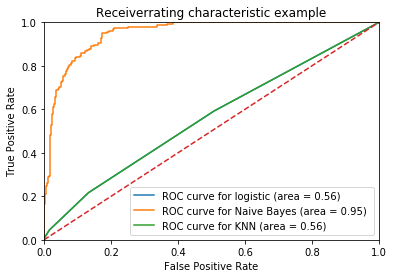

In [165]:
pl.clf()
pl.plot(fpr1,tpr1,label = 'ROC curve for logistic (area = %0.2f)' %roc_curve1)
pl.plot(fpr2,tpr2,label = 'ROC curve for Naive Bayes (area = %0.2f) ' %roc_curve2)
pl.plot(fpr3,tpr3,label = 'ROC curve for KNN (area = %0.2f)' %roc_curve3)
pl.plot([0,1],[0,1],'--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc = 'lower right')
pl.show()

In [ ]:
# Analyzing the behaviour of model in the Production Env through Kfold

In [166]:
from sklearn.model_selection import KFold

In [221]:
kfold = KFold(n_splits=10,random_state= 42)

In [222]:
results = cross_val_score(gnb,X,y,cv = kfold)

In [225]:
print ('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

Accuracy: 92.90% (0.88%)


# Better model out of the above is Naive Bayes as it has overall accuracy is higher and also the class level accuracy for personal loan (1) has increased.

# Naive Bayes performs better as tries to assign to class on the basis of Probability.


